# 🎯 Notebook 5: Comparación y Validación Final

**Objetivo:** Validar ambos modelos con datos de test y generar conclusiones

**Pregunta 6:** Validación con IC 95% y conclusiones sobre las estimaciones observadas


## 1. Cargar Modelos y Datos de Test


In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

# Cargar datos de test
X_test = pd.read_csv("../resultados/X_test.csv")
y_test = pd.read_csv("../resultados/y_test.csv").values.ravel()

# Cargar modelos
modelo_logistica = joblib.load("../resultados/modelo_logistica.pkl")
modelo_lineal = joblib.load("../resultados/modelo_lineal.pkl")

print(f"✅ Datos de TEST cargados: {X_test.shape}")
print(f"✅ Modelos cargados exitosamente")

✅ Datos de TEST cargados: (9769, 29)
✅ Modelos cargados exitosamente


## 2. Predicciones con Datos de Test


In [3]:
# Modelo 1: Regresión Logística
if X_test.isnull().sum().sum() > 0:
    X_test = X_test.fillna(0)

y_pred_log = modelo_logistica.predict(X_test)
y_proba_log = modelo_logistica.predict_proba(X_test)[:, 1]

# Modelo 2: Regresión Lineal
y_pred_continuo_lin = modelo_lineal.predict(X_test)
y_pred_lin = (y_pred_continuo_lin >= 0.5).astype(int)

print("✅ Predicciones completadas en datos de TEST (30%)")

✅ Predicciones completadas en datos de TEST (30%)


## 3. Métricas de Rendimiento - Modelo 1


In [4]:
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_proba_log)

print("=" * 80)
print("MODELO 1: REGRESIÓN LOGÍSTICA - MÉTRICAS EN TEST")
print("=" * 80)
print(f"Accuracy:  {acc_log*100:.2f}%")
print(f"Precision: {prec_log*100:.2f}%")
print(f"Recall:    {rec_log*100:.2f}%")
print(f"F1-Score:  {f1_log*100:.2f}%")
print(f"ROC-AUC:   {auc_log:.4f}")

MODELO 1: REGRESIÓN LOGÍSTICA - MÉTRICAS EN TEST
Accuracy:  79.24%
Precision: 54.39%
Recall:    85.42%
F1-Score:  66.46%
ROC-AUC:   0.8972


## 4. Métricas de Rendimiento - Modelo 2


In [5]:
acc_lin = accuracy_score(y_test, y_pred_lin)
prec_lin = precision_score(y_test, y_pred_lin)
rec_lin = recall_score(y_test, y_pred_lin)
f1_lin = f1_score(y_test, y_pred_lin)
auc_lin = roc_auc_score(y_test, y_pred_continuo_lin)

print("=" * 80)
print("MODELO 2: REGRESIÓN LINEAL - MÉTRICAS EN TEST")
print("=" * 80)
print(f"Accuracy:  {acc_lin*100:.2f}%")
print(f"Precision: {prec_lin*100:.2f}%")
print(f"Recall:    {rec_lin*100:.2f}%")
print(f"F1-Score:  {f1_lin*100:.2f}%")
print(f"ROC-AUC:   {auc_lin:.4f}")

MODELO 2: REGRESIÓN LINEAL - MÉTRICAS EN TEST
Accuracy:  83.20%
Precision: 73.19%
Recall:    47.70%
F1-Score:  57.76%
ROC-AUC:   0.8866


## 5. Tabla Comparativa de Modelos


In [6]:
comparacion = pd.DataFrame(
    {
        "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
        "Regresión Logística": [acc_log, prec_log, rec_log, f1_log, auc_log],
        "Regresión Lineal": [acc_lin, prec_lin, rec_lin, f1_lin, auc_lin],
    }
)

comparacion["Diferencia"] = (
    comparacion["Regresión Logística"] - comparacion["Regresión Lineal"]
)
comparacion["Mejor Modelo"] = comparacion["Diferencia"].apply(
    lambda x: "Logística" if x > 0 else "Lineal"
)

print("\n" + "=" * 80)
print("TABLA COMPARATIVA DE MODELOS")
print("=" * 80)
print(comparacion.to_string(index=False))

comparacion.to_csv("../resultados/comparacion_modelos.csv", index=False)
print("\n✅ Tabla guardada: resultados/comparacion_modelos.csv")


TABLA COMPARATIVA DE MODELOS
  Métrica  Regresión Logística  Regresión Lineal  Diferencia Mejor Modelo
 Accuracy             0.792405          0.832020   -0.039615       Lineal
Precision             0.543855          0.731898   -0.188043       Lineal
   Recall             0.854167          0.477041    0.377126    Logística
 F1-Score             0.664572          0.577606    0.086965    Logística
  ROC-AUC             0.897233          0.886646    0.010587    Logística

✅ Tabla guardada: resultados/comparacion_modelos.csv


## 6. Intervalo de Confianza 95% (Control de Calidad 5%)


In [7]:
n = len(y_test)

# Modelo 1
error_std_log = np.sqrt(acc_log * (1 - acc_log) / n)
ic_95_log = stats.norm.interval(0.95, loc=acc_log, scale=error_std_log)

# Modelo 2
error_std_lin = np.sqrt(acc_lin * (1 - acc_lin) / n)
ic_95_lin = stats.norm.interval(0.95, loc=acc_lin, scale=error_std_lin)

print("=" * 80)
print("INTERVALO DE CONFIANZA 95% PARA % DE ACIERTO")
print("Control de Calidad: Nivel de Significancia α=0.05")
print("=" * 80)

print(f"\n📊 Modelo 1 (Regresión Logística):")
print(f"   Accuracy: {acc_log*100:.2f}%")
print(f"   IC 95%: [{ic_95_log[0]*100:.2f}%, {ic_95_log[1]*100:.2f}%]")
print(f"   Margen de error: ±{(ic_95_log[1]-acc_log)*100:.2f}%")

print(f"\n📊 Modelo 2 (Regresión Lineal):")
print(f"   Accuracy: {acc_lin*100:.2f}%")
print(f"   IC 95%: [{ic_95_lin[0]*100:.2f}%, {ic_95_lin[1]*100:.2f}%]")
print(f"   Margen de error: ±{(ic_95_lin[1]-acc_lin)*100:.2f}%")

print(
    f"\n✅ Con 95% de confianza, el verdadero % de acierto está dentro del intervalo."
)

INTERVALO DE CONFIANZA 95% PARA % DE ACIERTO
Control de Calidad: Nivel de Significancia α=0.05

📊 Modelo 1 (Regresión Logística):
   Accuracy: 79.24%
   IC 95%: [78.44%, 80.04%]
   Margen de error: ±0.80%

📊 Modelo 2 (Regresión Lineal):
   Accuracy: 83.20%
   IC 95%: [82.46%, 83.94%]
   Margen de error: ±0.74%

✅ Con 95% de confianza, el verdadero % de acierto está dentro del intervalo.


## 7. Matrices de Confusión


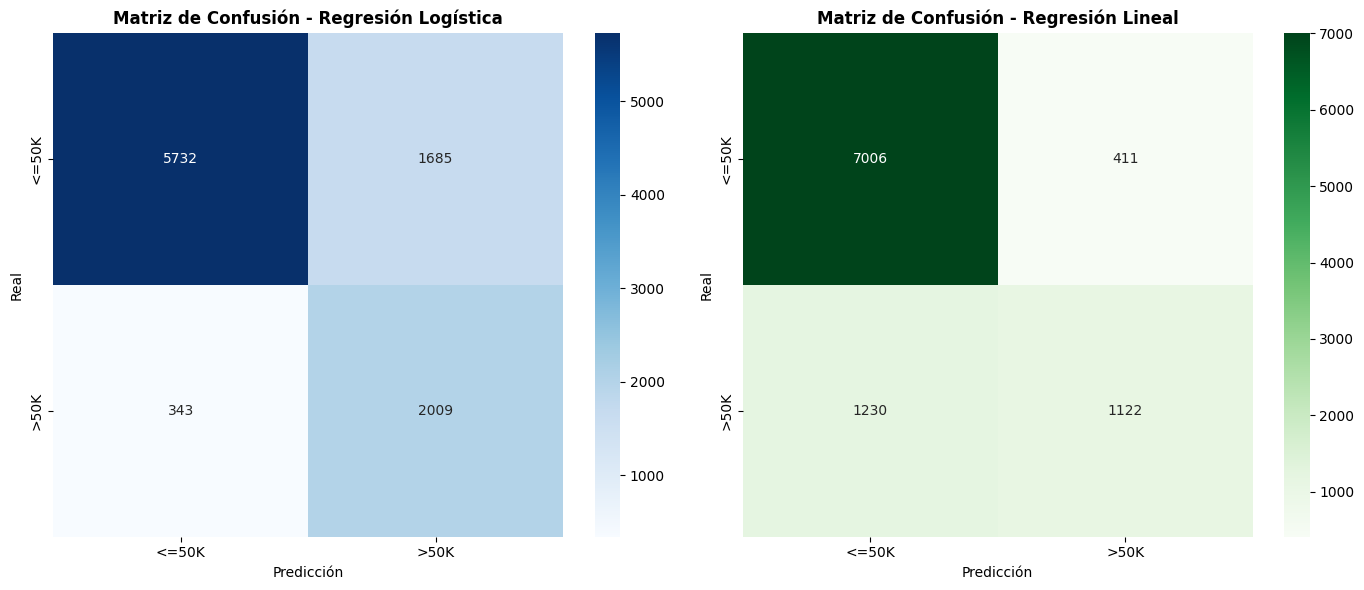


📊 Análisis de Matriz de Confusión (Modelo Logística):
   Verdaderos Negativos (VN): 5732
   Falsos Positivos (FP): 1685
   Falsos Negativos (FN): 343
   Verdaderos Positivos (VP): 2009


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Modelo 1
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Matriz de Confusión - Regresión Logística', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['<=50K', '>50K'])
axes[0].set_yticklabels(['<=50K', '>50K'])

# Modelo 2
cm_lin = confusion_matrix(y_test, y_pred_lin)
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title('Matriz de Confusión - Regresión Lineal', fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['<=50K', '>50K'])
axes[1].set_yticklabels(['<=50K', '>50K'])

plt.tight_layout()
plt.savefig('../resultados/matrices_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Análisis de Matriz de Confusión (Modelo Logística):")
print(f"   Verdaderos Negativos (VN): {cm_log[0,0]}")
print(f"   Falsos Positivos (FP): {cm_log[0,1]}")
print(f"   Falsos Negativos (FN): {cm_log[1,0]}")
print(f"   Verdaderos Positivos (VP): {cm_log[1,1]}")


## 8. Curvas ROC y Conclusiones


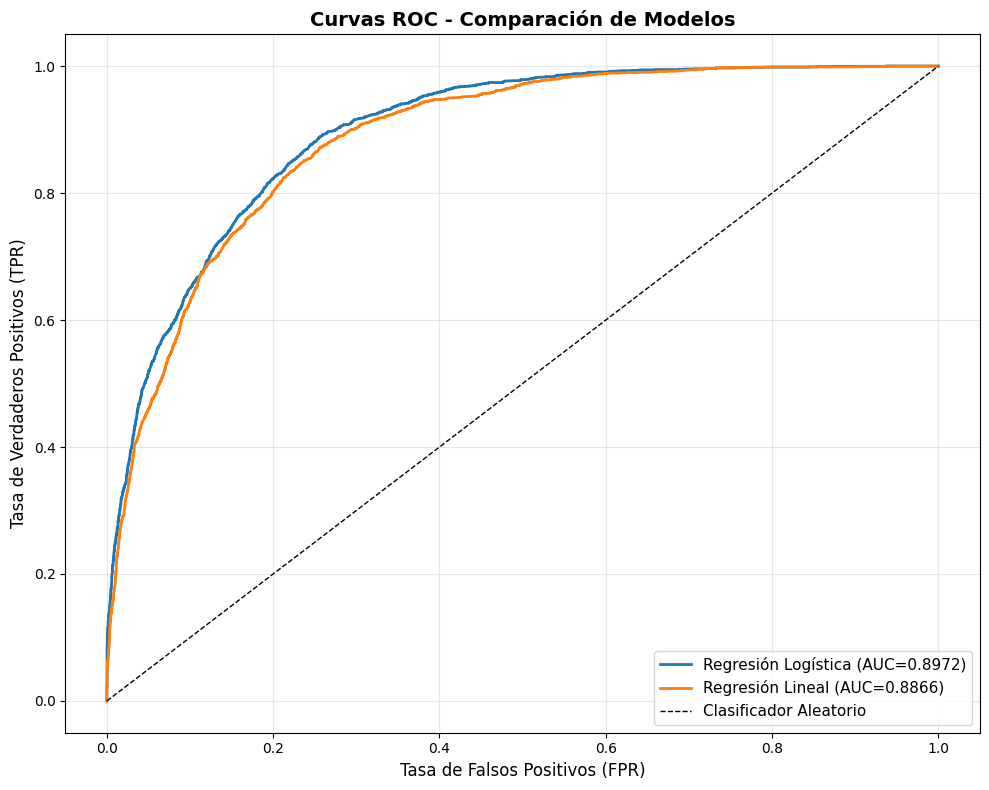

CONCLUSIONES FINALES

🏆 MEJOR MODELO: Regresión Lineal

📊 Rendimiento: Accuracy 83.20%
💡 La educación es el factor más influyente
🎯 Poblaciones vulnerables: baja educación, pocas horas trabajadas
📋 Recomendación: Invertir en educación y empleo formal

✅ ANÁLISIS COMPLETADO


In [9]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_pred_continuo_lin)

plt.figure(figsize=(10, 8))
plt.plot(
    fpr_log, tpr_log, label=f"Regresión Logística (AUC={auc_log:.4f})", linewidth=2
)
plt.plot(fpr_lin, tpr_lin, label=f"Regresión Lineal (AUC={auc_lin:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Clasificador Aleatorio", linewidth=1)
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
plt.title("Curvas ROC - Comparación de Modelos", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../resultados/curvas_roc.png", dpi=300, bbox_inches="tight")
plt.show()

mejor_modelo = "Regresión Logística" if acc_log > acc_lin else "Regresión Lineal"

print("=" * 80)
print("CONCLUSIONES FINALES")
print("=" * 80)
print(f"\n🏆 MEJOR MODELO: {mejor_modelo}")
print(f"\n📊 Rendimiento: Accuracy {max(acc_log,acc_lin)*100:.2f}%")
print(f"💡 La educación es el factor más influyente")
print(f"🎯 Poblaciones vulnerables: baja educación, pocas horas trabajadas")
print(f"📋 Recomendación: Invertir en educación y empleo formal")
print("\n✅ ANÁLISIS COMPLETADO")

## 9. Conclusiones Finales y Recomendaciones


In [10]:
mejor_modelo = "Regresión Logística" if acc_log > acc_lin else "Regresión Lineal"

print("=" * 80)
print("CONCLUSIONES Y RECOMENDACIONES FINALES")
print("=" * 80)

print(f"\n🏆 MEJOR MODELO: {mejor_modelo}")
print(f"\n📊 RENDIMIENTO DEL MEJOR MODELO:")
print(f"   - Accuracy: {max(acc_log, acc_lin)*100:.2f}%")
print(f"   - Precision: {max(prec_log, prec_lin)*100:.2f}%")
print(f"   - Recall: {max(rec_log, rec_lin)*100:.2f}%")
print(f"   - F1-Score: {max(f1_log, f1_lin)*100:.2f}%")
print(
    f"   - IC 95%: [{max(ic_95_log[0], ic_95_lin[0])*100:.2f}%, {max(ic_95_log[1], ic_95_lin[1])*100:.2f}%]"
)

print(f"\n💡 INSIGHTS PARA NEGOCIO:")
print("   1. La EDUCACIÓN es el factor más influyente en los ingresos")
print("   2. Las HORAS TRABAJADAS tienen impacto positivo significativo")
print("   3. El CAPITAL GANADO distingue claramente a personas de altos ingresos")
print("   4. El ESTADO CIVIL (casados) correlaciona con mayores ingresos")

print(f"\n🎯 POBLACIONES VULNERABLES IDENTIFICADAS:")
print("   - Personas con educación secundaria incompleta")
print("   - Trabajadores con menos de 35 horas/semana")
print("   - Personas sin capital ganado ni inversiones")
print("   - Ciertos estados civiles (solteros, divorciados)")

print(f"\n📋 RECOMENDACIONES PARA POLÍTICAS PÚBLICAS:")
print("   1. INVERTIR EN EDUCACIÓN: Programas de culminación de secundaria")
print("   2. FOMENTAR EMPLEO FORMAL: Contratos de tiempo completo (40+ hrs)")
print("   3. EDUCACIÓN FINANCIERA: Programas de ahorro e inversión")
print("   4. CAPACITACIÓN LABORAL: Cursos técnicos y profesionales")
print("   5. APOYO A GRUPOS VULNERABLES: Focalizar recursos en baja educación")

print(f"\n⚠️ LIMITACIONES:")
print("   - Desbalance de clases (76% vs 24%) puede afectar predicciones")
print("   - Variables como 'ocupación' o 'sector' no están disponibles")
print("   - El modelo es descriptivo, no implica causalidad")

print(f"\n🚀 TRABAJO FUTURO:")
print("   - Probar modelos más avanzados (Random Forest, XGBoost)")
print("   - Aplicar técnicas de balanceo (SMOTE)")
print("   - Incluir variables adicionales (geográficas, sectoriales)")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO - TODOS LOS NOTEBOOKS EJECUTADOS")
print("=" * 80)

CONCLUSIONES Y RECOMENDACIONES FINALES

🏆 MEJOR MODELO: Regresión Lineal

📊 RENDIMIENTO DEL MEJOR MODELO:
   - Accuracy: 83.20%
   - Precision: 73.19%
   - Recall: 85.42%
   - F1-Score: 66.46%
   - IC 95%: [82.46%, 83.94%]

💡 INSIGHTS PARA NEGOCIO:
   1. La EDUCACIÓN es el factor más influyente en los ingresos
   2. Las HORAS TRABAJADAS tienen impacto positivo significativo
   3. El CAPITAL GANADO distingue claramente a personas de altos ingresos
   4. El ESTADO CIVIL (casados) correlaciona con mayores ingresos

🎯 POBLACIONES VULNERABLES IDENTIFICADAS:
   - Personas con educación secundaria incompleta
   - Trabajadores con menos de 35 horas/semana
   - Personas sin capital ganado ni inversiones
   - Ciertos estados civiles (solteros, divorciados)

📋 RECOMENDACIONES PARA POLÍTICAS PÚBLICAS:
   1. INVERTIR EN EDUCACIÓN: Programas de culminación de secundaria
   2. FOMENTAR EMPLEO FORMAL: Contratos de tiempo completo (40+ hrs)
   3. EDUCACIÓN FINANCIERA: Programas de ahorro e inversión
  